In [1]:
import sys
sys.path.append('../')

import pandas as pd

In [2]:
competitors = pd.read_parquet('../data/raw/competitors.parquet.gzip')
parents = pd.read_parquet('../data/raw/parents.parquet.gzip')
partners = pd.read_parquet('../data/raw/partners.parquet.gzip')
suppliers = pd.read_parquet('../data/raw/suppliers.parquet.gzip')
info = pd.read_parquet('../data/raw/entity_info.parquet.gzip')
address = pd.read_parquet('../data/raw/addresses.parquet.gzip')

In [3]:
competitors.head()

,source_id,target_id,start_date,source_name,targte_name,type
0,50472,58267,2020-03-23,"Infinity Pharmaceuticals, Inc.",Innate Pharma SA,COMPETES
1,282940,4383,2020-03-23,"Bozhon Precision Industry Technology Co., Ltd.",National Instruments Corp.,COMPETES
2,50472,247699,2020-03-23,"Infinity Pharmaceuticals, Inc.","NextCure, Inc.",COMPETES
3,313953,29664,2020-03-23,Quaker Houghton,"Yushiro Chemical Industry Co., Ltd.",COMPETES
4,313953,129287,2020-03-23,Quaker Houghton,Petrofer GmbH,COMPETES


In [4]:
parents.head()

,source_id,target_id,start_date,source_name,targte_name,type
0,265502,369980,2022-04-01,Linde Plc,"Wahlco Environmental Systems, Inc.",ULTIMATE_PARENT_OF
1,318,3840,2022-04-01,"Verizon Communications, Inc.",Western Wireless Corp.,ULTIMATE_PARENT_OF
2,292835,3841,2022-04-01,Truist Financial Corp.,"Main Street Banks, Inc. (Atlanta, Georgia)",ULTIMATE_PARENT_OF
3,1971,3843,2022-04-01,"The PNC Financial Services Group, Inc.",Yardville National Bancorp,ULTIMATE_PARENT_OF
4,25278,3844,2022-04-01,"Toray Industries, Inc.","Zoltek Cos., Inc.",ULTIMATE_PARENT_OF


In [5]:
partners.head()

,source_id,target_id,start_date,source_name,targte_name,type
0,323302,97940,2021-12-08,"& Factory, Inc.",Amix Co. Ltd.,PARTNERS
1,323302,313319,2021-12-08,"& Factory, Inc.","Mirror Fit Co., Ltd.",PARTNERS
2,323302,150832,2021-12-08,"& Factory, Inc.",Housecom Corp.,PARTNERS
3,323302,313325,2021-12-08,"& Factory, Inc.",Miyoshi Real Estate Co. Ltd.,PARTNERS
4,323302,137558,2021-12-08,"& Factory, Inc.",Maeda & Co. Ltd.,PARTNERS


In [6]:
suppliers.head()

,source_id,target_id,revenue_pct,start_date,source_name,targte_name,type
0,46216,317277,NaN,2018-08-25,Ever Team Software SAS,GFI Informatique SA,SUPPLIES
1,323302,362405,12.0,2021-12-08,"& Factory, Inc.","Shogakukan, Inc.",SUPPLIES
2,323302,96117,34.1,2021-12-08,"& Factory, Inc.","Square Enix Holdings Co., Ltd.",SUPPLIES
3,323302,362527,19.5,2021-12-08,"& Factory, Inc.","Shueisha, Inc.",SUPPLIES
4,323304,282371,NaN,2021-02-17,(B. Y.) Medimor Ltd.,InMode Ltd.,SUPPLIES


In [7]:
info.head()

,id,sector,industry,nace_description,code
0,93528,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
1,72520,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
2,64667,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
3,278227,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
4,72518,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11


In [8]:
address.head()

,id,name,country,city_state_postal,location_street1
0,50472,"Infinity Pharmaceuticals, Inc.",USA,"Cambridge, MA 02138",1100 Massachusetts Avenue
1,282940,"Bozhon Precision Industry Technology Co., Ltd.",CHN,"Suzhou, Jiangsu 215222",666 Huxin West Road
2,313953,Quaker Houghton,USA,"Conshohocken, PA 19428-2380",One Quaker Park
3,1441,Kohl's Corp.,USA,"Menomonee Falls, WI 53051",N56 West17000 Ridgewood Drive
4,135666,"Sorrento Therapeutics, Inc.",USA,"San Diego, CA 92121",4955 Directors Place


In [9]:
address.isna().sum()

id                       0
name                     0
country                 46
city_state_postal    37225
location_street1     45476
dtype: int64

In [10]:
suppliers['revenue_pct'] = suppliers['revenue_pct'].fillna(-999)

In [11]:
companies_source = pd.concat([competitors[['source_id','source_name']],
                      parents[['source_id','source_name']],
                      partners[['source_id','source_name']],
                      suppliers[['source_id','source_name']]],
                             ).drop_duplicates().rename(columns={'source_id': 'id', 'source_name': 'name'})
companies_target = pd.concat([competitors[['target_id','targte_name']],
                      parents[['target_id','targte_name']],
                      partners[['target_id','targte_name']],
                      suppliers[['target_id','targte_name']]],
                      ).drop_duplicates().rename(columns={'target_id':'id','targte_name':'name'})


In [12]:
companies = pd.concat([companies_source,companies_target]).drop_duplicates()
companies.reset_index(drop=True, inplace=True)

In [13]:
companies.to_csv('../data/processed/companies.csv',index=True, index_label='index')

In [12]:
competitors = competitors[['source_id','target_id','start_date','type']]
parents = parents[['source_id','target_id','start_date','type']]
partners = partners[['source_id','target_id','start_date','type']]
suppliers = suppliers[['source_id','target_id','revenue_pct','start_date','type']]

In [13]:
competitors.to_csv('../data/processed/competitors.csv',index=True, index_label='index')
parents.to_csv('../data/processed/parents.csv',index=True, index_label='index')
partners.to_csv('../data/processed/partners.csv',index=True, index_label='index')
suppliers.to_csv('../data/processed/suppliers.csv',index=True, index_label='index')
info.to_csv('../data/processed/info.csv',index=True, index_label='index')

In [14]:
len(info.industry.unique())

137

In [19]:
info

,id,sector,industry,nace_description,code
0,93528,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
1,72520,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
2,64667,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
3,278227,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
4,72518,Process Industries,Agricultural Commodities/Milling,"Growing of cereals (except rice), leguminous c...",01.11
...,...,...,...,...,...
236940,162438,Government,Supranational,Activities of extraterritorial organisations a...,99.00
236941,9627,Government,Supranational,Activities of extraterritorial organisations a...,99.00
236942,40206,Government,Supranational,Activities of extraterritorial organisations a...,99.00
236943,12488,Government,Supranational,Activities of extraterritorial organisations a...,99.00


In [23]:
info.groupby(['sector', 'industry']).nace_description.nunique()

sector               industry                         
Commercial Services  Advertising/Marketing Services        27
                     Commercial Printing/Forms             24
                     Financial Publishing/Services          9
                     Miscellaneous Commercial Services    122
                     Personnel Services                    17
                                                         ... 
Transportation       Trucking                              10
Utilities            Alternative Power Generation          11
                     Electric Utilities                    12
                     Gas Distributors                       9
                     Water Utilities                        7
Name: nace_description, Length: 137, dtype: int64

## Supplier Analysis

In [19]:
suppliers.start_date = pd.to_datetime(suppliers.start_date)

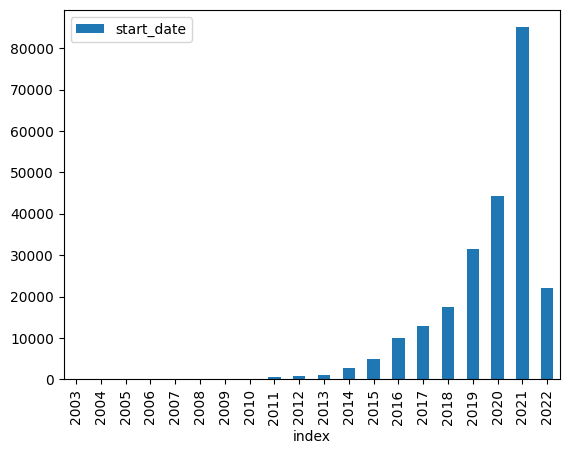

In [29]:
import matplotlib.pyplot as plt

supplier_relation_start_counts = suppliers.start_date.dt.year.value_counts().reset_index()
supplier_relation_start_counts.sort_values('index').plot.bar(x='index', y='start_date')
plt.show()

In [47]:
supplier_relation_start_counts.sort_values('index').cumsum()['start_date']/233753

13    0.000667
19    0.000826
17    0.001091
15    0.001399
14    0.001771
16    0.002053
18    0.002229
12    0.002965
11    0.005155
10    0.008496
9     0.012920
8     0.024552
7     0.045338
6     0.088341
5     0.143374
4     0.218389
2     0.352920
1     0.542192
0     0.905884
3     1.000000
Name: start_date, dtype: float64

In [32]:
suppliers["start_month"]= suppliers.start_date.dt.month
suppliers["start_year"] = suppliers.start_date.dt.year

In [35]:
supplier_grouped = suppliers.groupby(['start_year','start_month']).count()

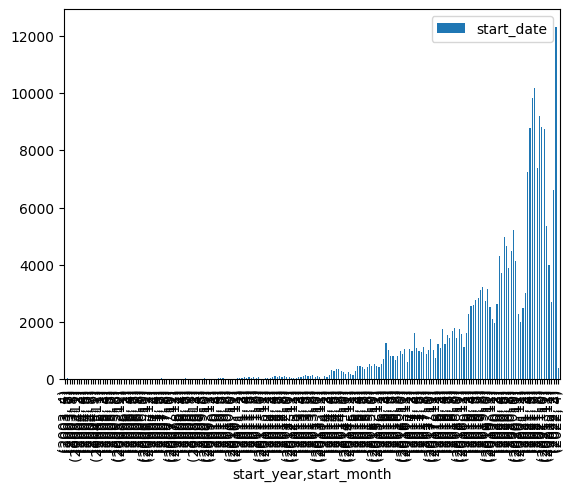

In [43]:
supplier_grouped.sort_index().plot.bar(y='start_date')
plt.show()

In [36]:
supplier_grouped

source_id  target_id  revenue_pct  start_date  \
start_year start_month                                                  
2003       4                  103        103          103         103   
           5                   28         28           28          28   
           6                    7          7            7           7   
           7                    4          4            4           4   
           8                    9          9            9           9   
...                           ...        ...          ...         ...   
2021       12                3995       3995         3995        3995   
2022       1                 2693       2693         2693        2693   
           2                 6595       6595         6595        6595   
           3                12318      12318        12318       12318   
           4                  394        394          394         394   

                        source_name  targte_name   type  
start_year start_month                                   
2003       4                    103          103    103  
           5                     28           28     28  
           6                      7            7      7  
           7                      4            4      4  
           8                      9            9      9  
...                             ...          ...    ...  
2021       12                  3995         3995   3995  
2022       1                   2693         2693   2693  
           2                   6595         6595   6595  
           3                  12318        12318  12318  
           4                    394          394    394  

[210 rows x 7 columns]

We can split the data using the year. All the supplier relations uptil 2020 would be the training set, the year 2021 would be the validation set and the 2022 the test set.